## SECOM

In [54]:

# Basic packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

# model packages
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression


## Data Understanding

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
secom = pd.read_table(url, header=None, delim_whitespace=True)

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
labels = pd.read_table(url, header=None, usecols=[0], squeeze=True, delim_whitespace=True)

C:\Users\ZhitingDu\AppData\Local\Temp\ipykernel_15576\710052082.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  labels = pd.read_table(url, header=None, usecols=[0], squeeze=True, delim_whitespace=True)


In [4]:
# rename the labels before merge
labels_df = pd.DataFrame({'Result': labels.values})
print(labels_df)

      Result
0         -1
1         -1
2          1
3         -1
4         -1
...      ...
1562      -1
1563      -1
1564      -1
1565      -1
1566      -1

[1567 rows x 1 columns]


In [5]:
# rename the features name to feature1, feature2...using functions
secom = secom.add_prefix('Feature-_')
secom

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_580,Feature-_581,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [6]:
# merge secom and lables, https://data-science-blog.com/en/blog/tag/secom/
secom_merged = pd.merge(secom, labels_df,left_index=True,right_index=True)

In [7]:
# Volatility of features
# each sensor measurement's attribut, std/mean and so on
secom_merged.describe()

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_581,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589,Result
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [8]:
secom_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Feature-_0 to Result
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


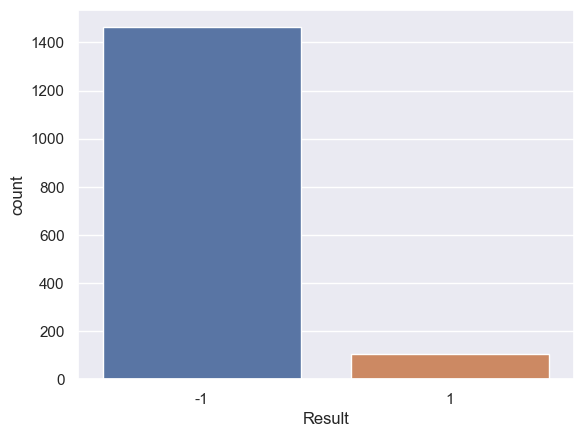

In [9]:
# frequency distribution of target values in bar
# imbalanced datasets 
sns.set(style="darkgrid")
ax = sns.countplot(x = "Result", data = secom_merged)

1567 examples, more than 1400 explames are "-1"which means pass, 104 examples are "1" as not pass. So here i use ML-logistic regression to deal with. If we consider pass and fail as two classes, then there are huge imbalance between these two classes. To cope with this case, Xgbooost is one of the methods for dealing imbalnace groups.

In [10]:
# histogram of percentage of missing values of features, 
# https://www.kaggle.com/code/mohitkumar409/semiconductor-manufacturing-process

df=secom_merged.isna().sum()*100/secom_merged.shape[0]
fig = px.line(x=df.index, y=df,title="Percentage of missing values in all the features, data=secom_merged"
              )
fig.update_xaxes(title_text= 'Features')
fig.update_yaxes(title_text= 'Percentage of Missing values',range=[0,100])
fig.show()

There are measures have high percentage of missing data, which will be anaylzed later on in the training data.

# Data Cleansing, Imputation and Scaling Methods 

In [11]:
# Volatility of features
# check the numbner of missing values of 590 sensor measurements
secom_merged.isnull().sum()

Feature-_0       6
Feature-_1       7
Feature-_2      14
Feature-_3      14
Feature-_4      14
                ..
Feature-_586     1
Feature-_587     1
Feature-_588     1
Feature-_589     1
Result           0
Length: 591, dtype: int64

Text(0.5, 1.0, 'Pair-wise Correlation heatmap for the Data')

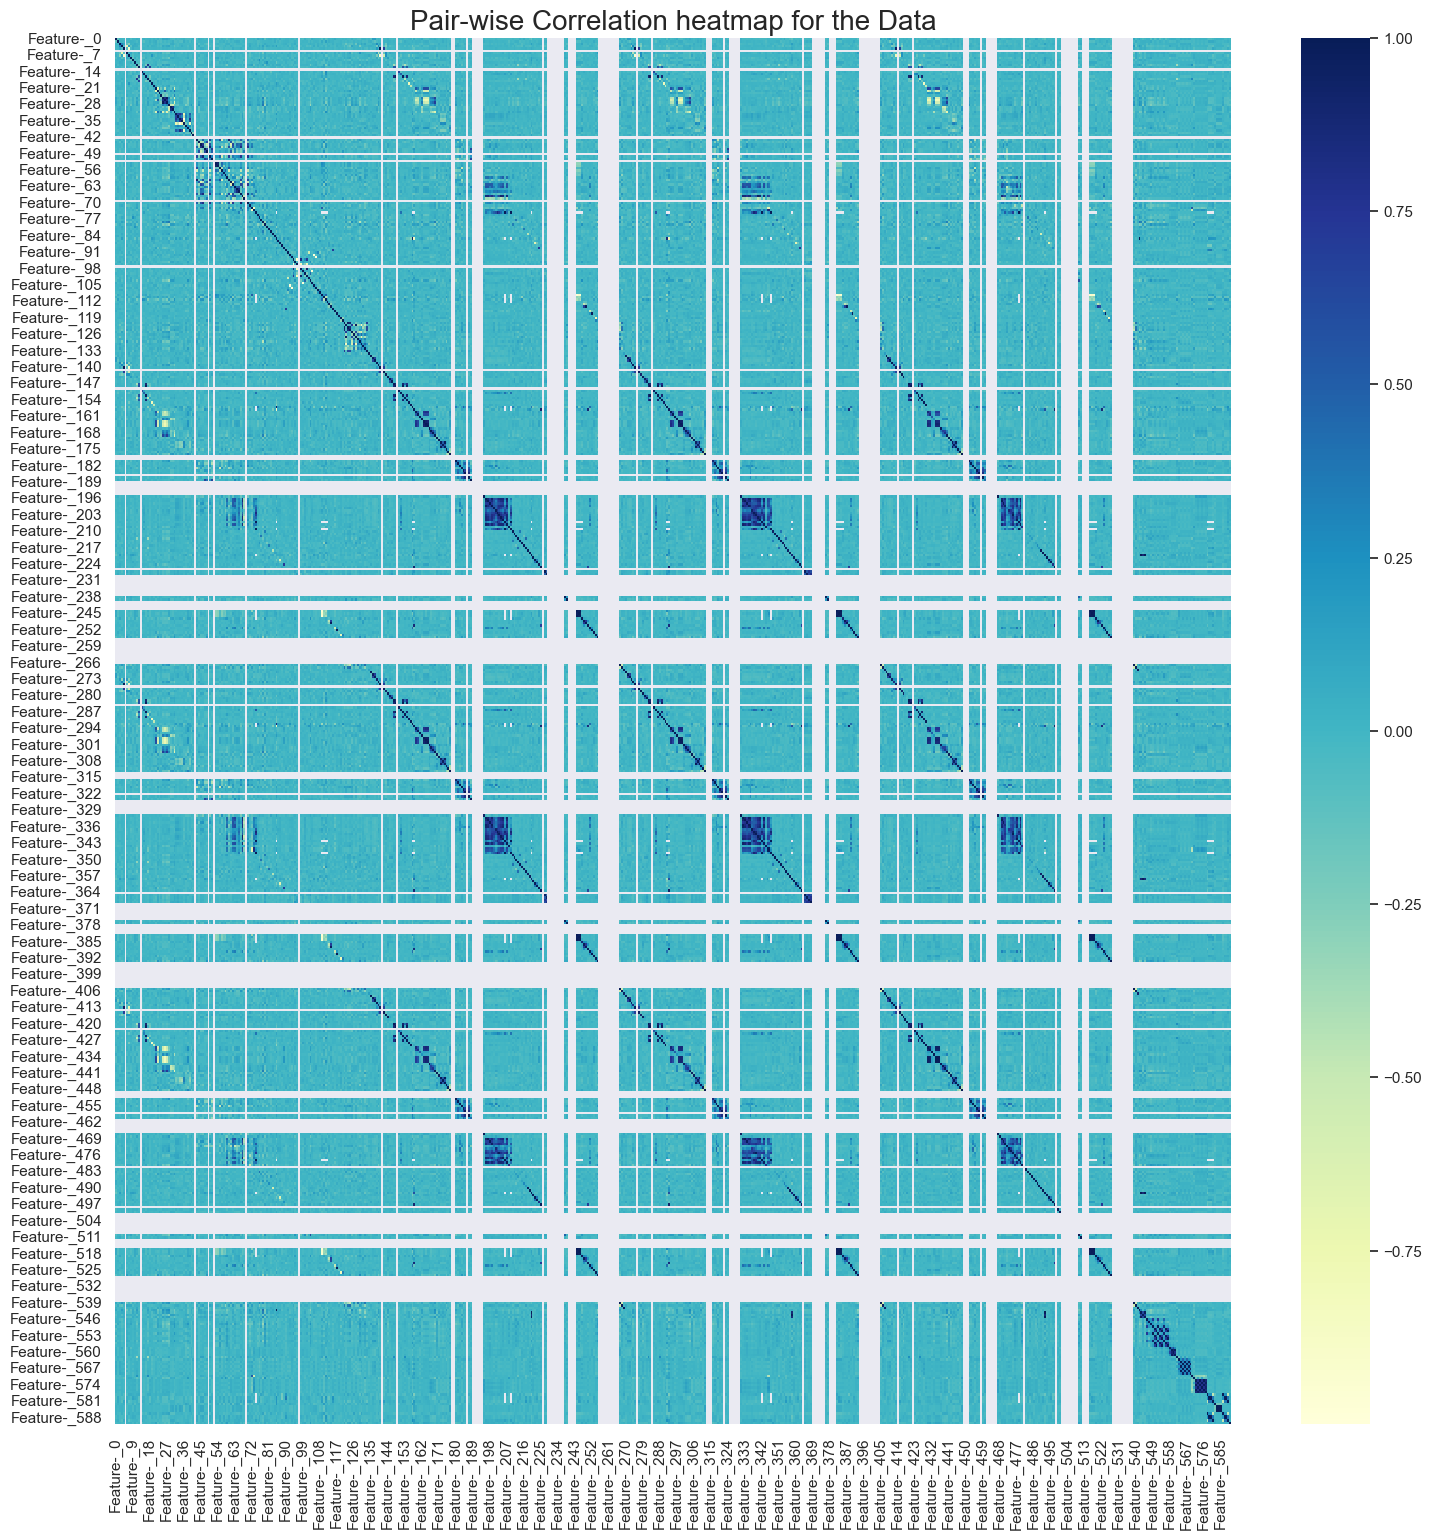

In [12]:
# Pair-wise correlation heatmap, https://www.kaggle.com/code/saurabhbagchi/fmst-semiconductor-manufacturing-project
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(secom_merged.corr(), cmap = "YlGnBu")
plt.title('Pair-wise Correlation heatmap for the Data', fontsize = 20)

In [13]:
# correlation Info
corr_matrix1 = secom_merged.corr()
corr_matrix1

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_581,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589,Result
Feature-_0,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177,-0.025144
Feature-_1,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834,-0.002615
Feature-_2,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226,-0.000957
Feature-_3,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157,-0.024631
Feature-_4,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Feature-_586,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559,0.004157
Feature-_587,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813,0.035392
Feature-_588,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211,0.031168
Feature-_589,0.004177,0.044834,-0.033226,-0.081157,0.051428,NaN,0.044227,-0.107875,-0.022776,0.004882,...,1.000000,0.041494,-0.003008,-0.003295,-0.003801,-0.486559,0.390813,0.389211,1.000000,-0.002654


In [14]:
# find highest correlation coefficient
highest_corr = corr_matrix1.max().max()
print('Highest correlation coefficient:', highest_corr)

Highest correlation coefficient: 1.0000000000000013


### Splite the data

In [15]:
# Split data ,https://www.kaggle.com/code/hoangtrung456/ucicom-project
X_train,X_test,y_train,y_test = train_test_split(secom,labels,test_size=0.2,random_state=0)


In [16]:
X_train

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_580,Feature-_581,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589
1476,3000.24,2477.37,2207.1000,1298.4309,1.0251,100.0,96.9478,0.1203,1.4642,0.0749,...,NaN,NaN,0.5024,0.0132,0.0040,2.6328,0.0057,0.0328,0.0114,579.1817
218,3038.21,2521.84,2273.7556,1549.8407,1.4105,100.0,105.0467,0.1171,1.3666,-0.0154,...,NaN,NaN,0.4968,0.0126,0.0029,2.5302,0.0279,0.0123,0.0045,44.1754
1137,2895.09,2552.96,2260.7333,1969.7867,1.2109,100.0,91.3367,0.1207,1.4135,0.0283,...,NaN,NaN,0.4996,0.0187,0.0047,3.7428,0.0392,0.0076,0.0030,19.5115
1533,3011.32,2417.43,2184.9889,1124.2096,2.1987,100.0,114.5856,0.1265,1.3834,0.0002,...,NaN,NaN,0.4995,0.0195,0.0044,3.9016,0.0168,0.0349,0.0120,207.2955
1092,3186.16,2316.01,2169.9444,1095.3519,1.3425,100.0,104.0144,0.1208,1.4757,-0.0106,...,0.0039,57.7037,0.5023,0.0271,0.0055,5.4003,0.0228,0.0132,0.0039,57.7037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3032.26,2455.05,2145.4555,1017.0577,1.4534,100.0,103.7878,0.1229,1.3602,-0.0153,...,NaN,NaN,0.4973,0.0194,0.0048,3.9109,0.0169,0.0276,0.0081,163.9998
835,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,0.1240,1.3940,-0.0073,...,0.0038,114.2878,0.5033,0.0154,0.0043,3.0647,0.0099,0.0113,0.0038,114.2878
1216,3031.85,2439.42,2172.8111,969.3436,1.2736,100.0,102.7367,0.1243,1.4711,0.0033,...,0.0012,15.3444,0.5009,0.0167,0.0041,3.3339,0.0293,0.0045,0.0012,15.3444
559,3072.99,2471.62,2126.6555,1015.0770,1.4381,100.0,102.4733,0.1255,1.5006,-0.0321,...,NaN,NaN,0.5050,0.0174,0.0042,3.4384,0.0335,0.0122,0.0040,36.2970


In [17]:
y_train

1476   -1
218     1
1137   -1
1533   -1
1092   -1
       ..
763    -1
835    -1
1216   -1
559    -1
684    -1
Name: 0, Length: 1253, dtype: int64

In [18]:
# rename the labels before merge
y_train = pd.DataFrame({'Result': y_train.values})
print(y_train)

      Result
0         -1
1          1
2         -1
3         -1
4         -1
...      ...
1248      -1
1249      -1
1250      -1
1251      -1
1252      -1

[1253 rows x 1 columns]


### Duplicate and missing value check, reduce the columns having high missing values

In [19]:
# duplicate identification
if X_train.duplicated().any():
    print("Duplicate rows found")
else:
    print("No duplicate rows found")

No duplicate rows found


In [20]:
#missing value analysis in training data, histogram, threshold defintion

df=X_train.isna().sum().sort_values(ascending=False)
fig = px.bar(x=df.index, 
             y = df, 
             title='Count of missing values per feature , data="train_merged"',
             text = round(df,1), color=df)
fig.update_xaxes(title_text='Features with missing value (sorted)',type='category')
fig.update_yaxes(title_text='Count of missing values')
fig.show()

In [21]:
#missing value analysis in training data, histogram, threshold defintion
df=X_train.isna().sum()*100/X_train.shape[0]
df = df[df>55].sort_values(ascending=False)
fig = px.bar(x=df.index, 
             y = df, 
             title='Percentage of missing values per feature (with >55% NaNs), data="train_merged"',
             text = round(df,1), color=df)
fig.update_xaxes(title_text='Features with more than 55% missing value (sorted)',type='category')
fig.update_yaxes(title_text='Percentage of missing values')
fig.show()

In [22]:
#missing value imputation method, reduce the unneed features
# there are 24 columns have more than 55% missing values, in this case will be removed
train_na=X_train.isna().sum()*100/X_train.shape[0]
train_na = df[df>55]
train_na.shape

(24,)

In [23]:
test_na=X_test.isna().sum()*100/X_test.shape[0]
test_na = df[df>55]
test_na.shape

(24,)

In [24]:
X_train.index

Int64Index([1476,  218, 1137, 1533, 1092,  295,  526,  670,  557,  987,
            ...
            1094,  599,  277, 1033, 1383,  763,  835, 1216,  559,  684],
           dtype='int64', length=1253)

In [25]:
#missing value imputation method, reduce the unneed features,after 566 features left
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis
X_train = X_train.drop(axis=1, columns=train_na.index)
X_train.shape

(1253, 566)

In [26]:
X_test = X_test.drop(axis=1, columns=test_na.index)
X_test.shape

(314, 566)

566 Features left, after reducing the columns having high percentage of NA

In [27]:
# missing value imputation method
# fill the data of the columns having less missing valeus percentage
#strategy : latest information available
X_train.fillna(method='ffill', inplace=True)
X_train.fillna(method='bfill', inplace=True)
X_train

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_576,Feature-_577,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589
1476,3000.24,2477.37,2207.1000,1298.4309,1.0251,100.0,96.9478,0.1203,1.4642,0.0749,...,1.0106,12.8330,0.5024,0.0132,0.0040,2.6328,0.0057,0.0328,0.0114,579.1817
218,3038.21,2521.84,2273.7556,1549.8407,1.4105,100.0,105.0467,0.1171,1.3666,-0.0154,...,1.5886,15.6838,0.4968,0.0126,0.0029,2.5302,0.0279,0.0123,0.0045,44.1754
1137,2895.09,2552.96,2260.7333,1969.7867,1.2109,100.0,91.3367,0.1207,1.4135,0.0283,...,1.6892,14.6674,0.4996,0.0187,0.0047,3.7428,0.0392,0.0076,0.0030,19.5115
1533,3011.32,2417.43,2184.9889,1124.2096,2.1987,100.0,114.5856,0.1265,1.3834,0.0002,...,0.8987,12.6242,0.4995,0.0195,0.0044,3.9016,0.0168,0.0349,0.0120,207.2955
1092,3186.16,2316.01,2169.9444,1095.3519,1.3425,100.0,104.0144,0.1208,1.4757,-0.0106,...,1.4926,14.3055,0.5023,0.0271,0.0055,5.4003,0.0228,0.0132,0.0039,57.7037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3032.26,2455.05,2145.4555,1017.0577,1.4534,100.0,103.7878,0.1229,1.3602,-0.0153,...,1.5505,15.3404,0.4973,0.0194,0.0048,3.9109,0.0169,0.0276,0.0081,163.9998
835,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,0.1240,1.3940,-0.0073,...,1.3573,10.5084,0.5033,0.0154,0.0043,3.0647,0.0099,0.0113,0.0038,114.2878
1216,3031.85,2439.42,2172.8111,969.3436,1.2736,100.0,102.7367,0.1243,1.4711,0.0033,...,1.0627,9.5553,0.5009,0.0167,0.0041,3.3339,0.0293,0.0045,0.0012,15.3444
559,3072.99,2471.62,2126.6555,1015.0770,1.4381,100.0,102.4733,0.1255,1.5006,-0.0321,...,1.6376,18.1211,0.5050,0.0174,0.0042,3.4384,0.0335,0.0122,0.0040,36.2970


In [28]:
# missing value imputation method
# fill the data of the columns having less missing valeus percentage
#strategy : latest information available
X_test.fillna(method='ffill', inplace=True)
X_test.fillna(method='bfill', inplace=True)
X_test

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_576,Feature-_577,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589
319,2926.40,2421.45,2180.9666,998.4939,1.3990,100.0,106.3311,0.1216,1.3899,0.0054,...,1.1763,15.6663,0.5036,0.0150,0.0035,2.9800,0.0262,0.0076,0.0022,29.1606
1045,2935.34,2551.27,2276.4556,2148.5397,1.2317,100.0,93.6778,0.1199,1.4132,-0.0310,...,1.1787,17.4432,0.4941,0.0178,0.0043,3.6018,0.0257,0.0174,0.0060,67.6124
1323,3023.56,2555.88,2205.2555,1412.7131,0.9785,100.0,95.2556,0.1216,1.5407,-0.0073,...,1.5615,12.5176,0.5018,0.0127,0.0034,2.5350,0.0230,0.0210,0.0053,91.4264
579,3042.36,2493.85,2124.8444,1180.2820,0.8465,100.0,100.7978,0.1257,1.3725,0.0335,...,1.6949,9.9320,0.4970,0.0143,0.0031,2.8703,0.0182,0.0139,0.0039,76.6094
414,2965.48,2467.94,2178.6889,1657.3518,1.6603,100.0,100.8022,0.1229,1.5611,0.0128,...,1.6362,10.3254,0.5008,0.0109,0.0029,2.1758,0.0433,0.0187,0.0056,43.1616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,3040.48,2512.03,2206.1444,1876.9899,2.0607,100.0,95.9511,0.1246,1.6242,0.0327,...,1.8720,9.3821,0.5026,0.0125,0.0029,2.4948,0.0174,0.0272,0.0100,156.5532
279,3010.71,2513.05,2243.7778,1502.9221,1.8160,100.0,102.0978,0.1195,1.4547,0.0285,...,1.4116,15.1177,0.5038,0.0158,0.0039,3.1364,0.0177,0.0184,0.0057,104.4612
884,3056.28,2464.40,2211.7778,1177.4224,1.3377,100.0,98.9989,0.1200,1.6411,-0.0068,...,1.6245,13.2830,0.4981,0.0148,0.0038,2.9799,0.0133,0.0139,0.0038,104.3034
224,3076.52,2502.62,2197.6444,1247.0334,0.7865,100.0,99.9211,0.1203,1.5059,0.0218,...,2.0961,10.6314,0.5025,0.0144,0.0038,2.8593,0.0287,0.0149,0.0048,51.8065


In [29]:
# check the result,good, no null values
X_train.isnull().values.any()

False

In [30]:
X_test.isnull().values.any()

False

### Correlation check, selecting out the features having small corr rate 

In [32]:
# identify important features , reduce the unneed features
# correlation analysis
# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis

def remove_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x





In [40]:
#Remove columns having more than +50% and less than -50% correlation
# 278 columns (features) left
# drop the left related column
X_train = remove_collinear_features(X_train,0.50)
X_train.shape


(1253, 277)

In [36]:
X_test = remove_collinear_features(X_test,0.50)


277 Features left after using correlation analysis

Text(0.5, 1.0, 'Pair-wise Correlation < 50% heatmap for the Data')

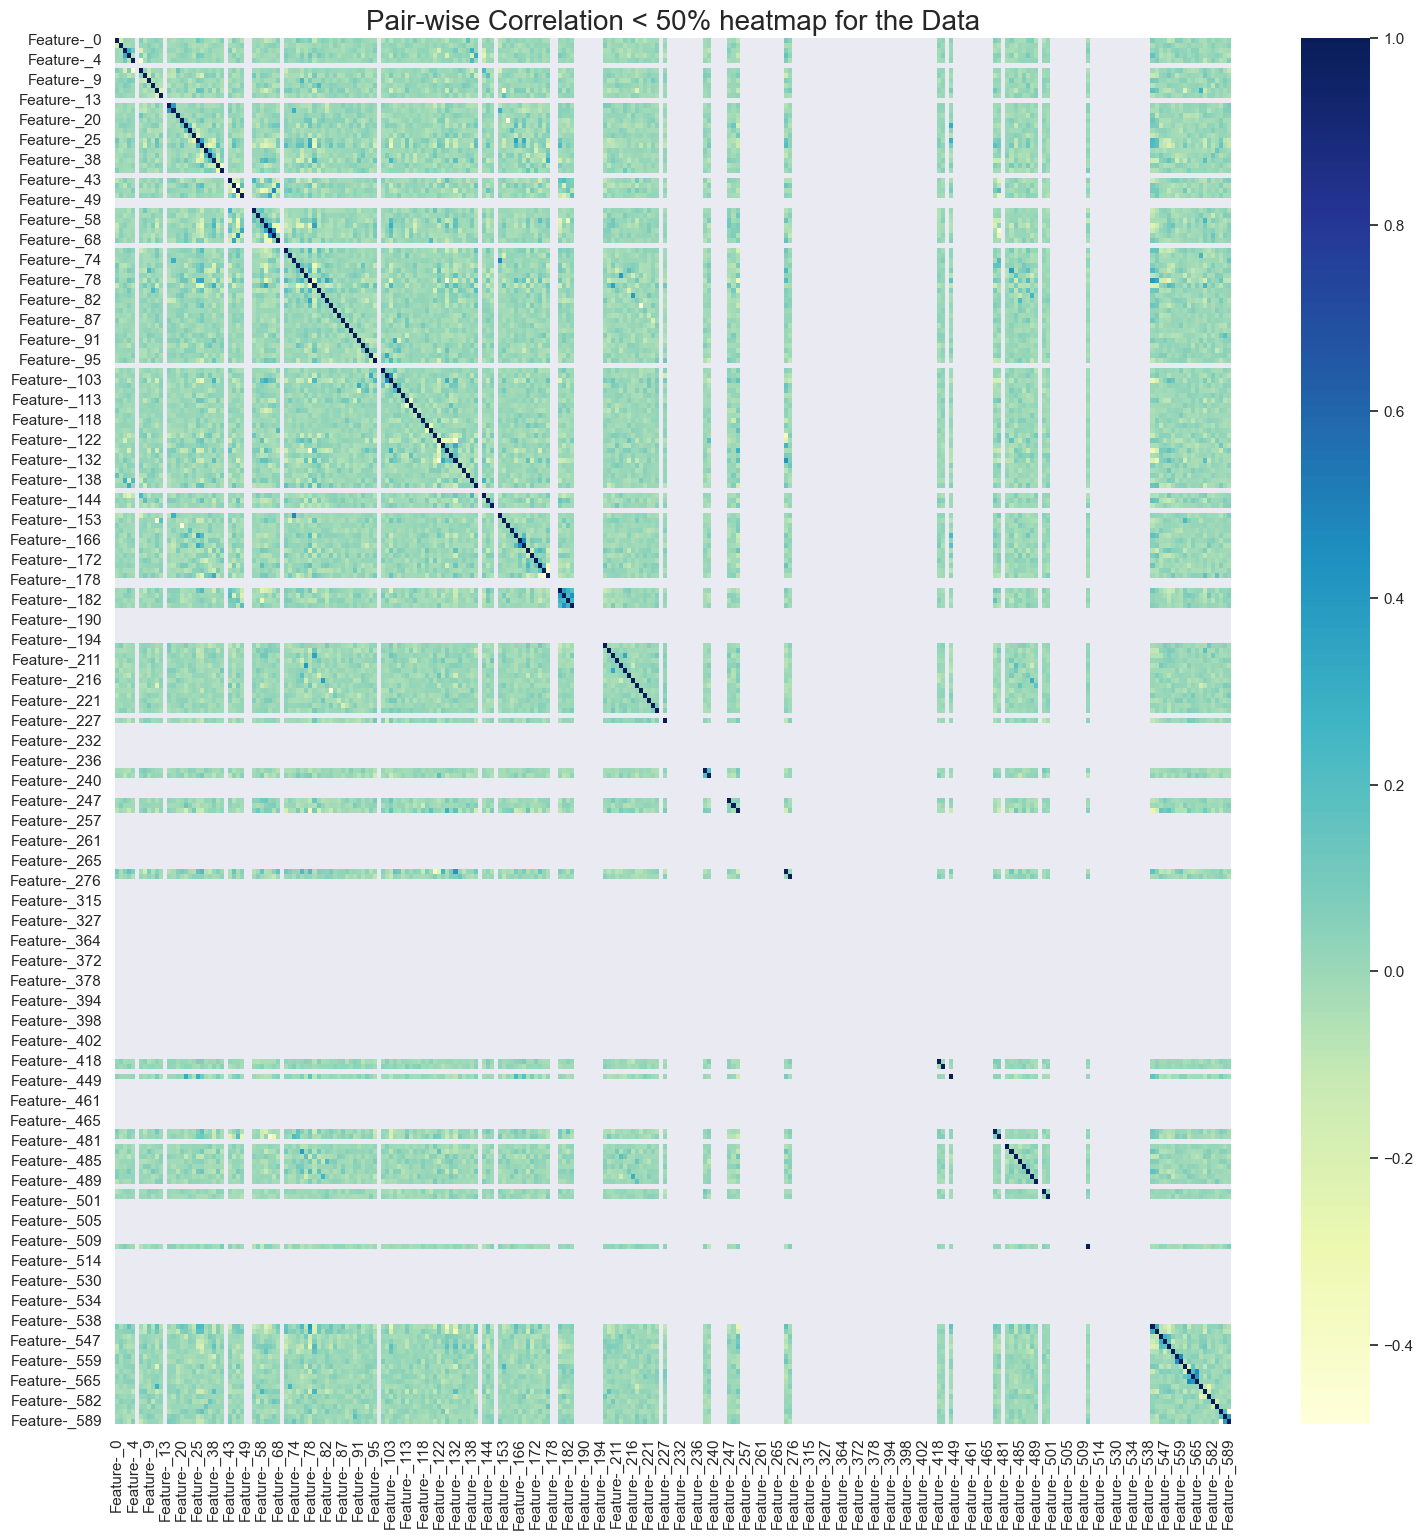

In [41]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(X_train.corr(), cmap = "YlGnBu")
plt.title('Pair-wise Correlation < 50% heatmap for the Data', fontsize = 20)

### Scaling and variance check

In [55]:
# checking the smaller vairances and remove , and then scaling
# https://www.kaggle.com/code/halflingwizard/feature-selection-from-600-to-17-features
Scaler=MinMaxScaler()
Scaler.fit(X_train)


MinMaxScaler()

In [65]:
X_train=Scaler.transform(X_train)
X_train_scal = pd.DataFrame(Scaler.transform(X_train))
X_train_scal

c:\Users\ZhitingDu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

c:\Users\ZhitingDu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,-4.94135,-3.346801,-8.125416,3.578568e-26,-0.000612,-700.0,1.608192e+06,-344.727977,1.854535e+06,1.404782e+07,...,-0.064037,1.678579,-1.169121,-1.259548,-0.010786,8.008063e+09,0.909314,5.907602e+05,2.449125e+07,6.631906e-21
1,-4.94135,-3.346801,-8.125416,4.271472e-26,-0.000612,-700.0,1.565414e+06,-389.072377,6.246217e+05,1.205555e+07,...,-0.064037,0.486181,-1.169121,-1.257715,-0.010786,2.914893e+09,0.636704,1.117504e+06,7.375694e+06,5.058293e-22
2,-4.94135,-3.346801,-8.125416,5.428873e-26,-0.000612,-700.0,1.613539e+06,-367.763439,1.219829e+06,8.912823e+06,...,-0.064037,1.417582,-1.169121,-1.253711,-0.010786,5.461478e+09,3.408230,1.385622e+06,3.451640e+06,2.234159e-22
3,-4.94135,-3.346801,-8.125416,3.098402e-26,-0.000612,-700.0,1.691075e+06,-381.439324,8.370984e+05,1.000717e+07,...,-0.064037,1.763019,-1.169121,-1.251789,-0.010786,5.370529e+09,3.771708,8.541323e+05,2.624455e+07,2.373632e-21
4,-4.94135,-3.346801,-8.125416,3.018868e-26,-0.000612,-700.0,1.614876e+06,-339.502970,6.899991e+05,9.389844e+06,...,-0.064037,10.979794,-1.169121,-1.255350,-0.010786,7.917114e+09,7.224756,9.964956e+05,8.127108e+06,6.607348e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,-4.94135,-3.346801,-8.125416,2.803084e-26,-0.000612,-700.0,1.642949e+06,-391.980206,6.259837e+05,1.163465e+07,...,-0.064037,0.591092,-1.169121,-1.251704,-0.010786,3.369640e+09,3.726273,8.565051e+05,2.014974e+07,1.877876e-21
1249,-4.94135,-3.346801,-8.125416,5.536731e-26,-0.000612,-700.0,1.657654e+06,-376.623232,7.349461e+05,1.090509e+07,...,-0.064037,5.329977,-1.169121,-1.252546,-0.010786,8.826608e+09,1.908880,6.904145e+05,6.540789e+06,1.308650e-21
1250,-4.94135,-3.346801,-8.125416,2.671580e-26,-0.000612,-700.0,1.661665e+06,-341.592973,8.793213e+05,1.017553e+07,...,-0.064037,0.591092,-1.169121,-1.256504,-0.010786,6.643821e+09,2.499533,1.150723e+06,8.634345e+05,1.757007e-22
1251,-4.94135,-3.346801,-8.125416,2.797625e-26,-0.000612,-700.0,1.677706e+06,-328.189696,3.971626e+05,8.295501e+06,...,-0.064037,2.546010,-1.169121,-1.255131,-0.010786,1.037275e+10,2.817577,1.250377e+06,7.292203e+06,4.156179e-22


In [66]:
Scaler=MinMaxScaler()
Scaler.fit(X_test)

MinMaxScaler()

In [67]:
X_test=Scaler.transform(X_test)
X_test_scal = pd.DataFrame(Scaler.transform(X_test))
X_test_scal

c:\Users\ZhitingDu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,-4.727594,-3.138577,-9.357254,-0.289236,-0.142721,-100.0,7.468480,-2.617410,6.277680,8.672580,...,-0.025072,0.164579,-1.598103,-0.308948,-0.008114,11.240383,0.020717,2.775330,2.082857,0.000098
1,-4.727568,-3.138302,-9.355284,-0.289090,-0.158978,-100.0,7.364069,-2.448766,1.713125,8.025731,...,-0.022100,0.522545,-1.598167,-0.201392,-0.008114,0.098518,0.033419,2.733091,6.879630,0.000227
2,-4.727311,-3.138293,-9.356753,-0.289184,-0.183583,-100.0,7.468480,-1.525929,4.685102,8.767705,...,-0.024772,0.175444,-1.598226,-0.561147,-0.008103,9.129293,0.010282,2.505001,8.641710,0.000307
3,-4.727256,-3.138424,-9.358412,-0.289213,-0.196410,-100.0,7.720296,-2.743350,9.801417,6.732033,...,-0.028735,0.252069,-1.598195,-0.119069,-0.008100,3.499719,0.017541,2.099508,5.166497,0.000257
4,-4.727480,-3.138479,-9.357301,-0.289153,-0.117329,-100.0,7.548324,-1.378275,7.205639,4.753436,...,-0.028735,0.252069,-1.598092,-0.221202,-0.008101,7.956465,0.002117,4.219899,7.515937,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,-4.727262,-3.138385,-9.356734,-0.289125,-0.078419,-100.0,7.652735,-0.921561,9.701097,5.552485,...,-0.026673,0.111971,-1.598209,-0.125596,-0.008095,10.067555,0.009375,2.031926,11.676404,0.000526
310,-4.727349,-3.138383,-9.355958,-0.289172,-0.102198,-100.0,7.339501,-2.148392,9.174417,6.389584,...,-0.025973,0.401603,-1.598186,-0.132026,-0.008107,11.474948,0.024346,2.057269,7.369097,0.000351
311,-4.727216,-3.138486,-9.356618,-0.289214,-0.148677,-100.0,7.370211,-0.799240,4.747802,6.085184,...,-0.024261,0.183736,-1.598189,-0.148816,-0.008102,4.789829,0.019809,1.685567,5.166497,0.000350
312,-4.727157,-3.138405,-9.356910,-0.289205,-0.202241,-100.0,7.388636,-1.777809,8.334238,7.055458,...,-0.024792,0.374727,-1.598209,-0.086692,-0.008088,9.950272,0.017995,2.986524,5.655964,0.000174


In [68]:
selector = VarianceThreshold()
selector.fit(X_train_scal)

VarianceThreshold()

In [69]:
mask = selector.get_support()
columns = X_train_scal.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 142


In [71]:
selector = VarianceThreshold()
selector.fit(X_test_scal)

VarianceThreshold()

In [72]:
mask = selector.get_support()
columns = X_test_scal.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 167


###  Imbalance of the target variable in training data

In [80]:
# deal with the imbalances of the target variable.in training data
# https://www.kaggle.com/code/hoangtrung456/ucicom-project
# Processing imbalance data by over sampling
y_train.value_counts()

Result
-1        1162
 1          91
dtype: int64

A huge imbalance found in the train_target data, thus using imbalance package to turn it balanced

In [90]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_var_smote,y_train_smote = smote.fit_resample(X_train_afterva,y_train)



ValueError: Found input variables with inconsistent numbers of samples: [314, 1253]

In [82]:
y_train_smote.value_counts()

Result
-1        1162
 1        1162
dtype: int64

In [ ]:
# scale the test as well


# Build model

In [ ]:
# grid search determine the optimal parameters for the imbalance and imputation approach and fit models.

In [314]:
# Assess the models using different measures based on the confusion matrix.
# https://www.kaggle.com/code/saurabhbagchi/fmst-semiconductor-manufacturing-project
model = LogisticRegression()
model.fit(X_train_var_smote, y_train_smote)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')


c:\Users\ZhitingDu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ZhitingDu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Feature-_101
- Feature-_102
- Feature-_104
- Feature-_105
- Feature-_106
- ...


In [ ]:
# Extend your model assessment by taking into account costs for wrongly classified wafers.

In [ ]:
# Findings